In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from numpy.random import normal, uniform
from numpy.random import uniform, randn
from scipy.stats import multivariate_normal, norm

In [2]:
%matplotlib inline

In [3]:
a = np.array([-0.3, 0.5])

In [4]:
def f(x, a): return a[0] + a[1] * x

In [5]:
N = 50
sigma = 0.2
X = uniform(-1, 1, (N, 1))
T = f(X, a) + randn(N, 1) * sigma

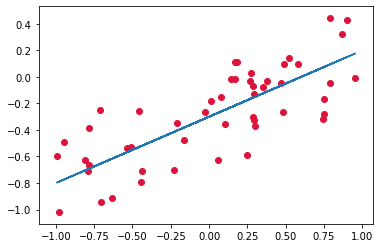

In [6]:
plt.plot(X,f(X, a))
plt.scatter(X, T, c="crimson");

In [7]:
beta = (1 / sigma) ** 2 # precision
alpha = 2.0

In [8]:
def posterior_w(phi, t, S0, m0):
    """
    Parameters
    ----------
    phi: np.array(N, M)
    t: np.array(N, 1)
    S0: np.array(M, M)
        The prior covariance matrix
    m0: np.array(M, 1)
        The prior mean vector
    """

    # Here '@' symbol is matrix multiplication
    SN = inv(inv(S0) + beta * Phi.T @ Phi)
    mN = SN @ (inv(S0) @ m0 + beta * Phi.T @ t)
    return SN, mN

In [9]:
def sample_vals(X, T, ix):
    """
    Returns
    -------
    Phi: The linear model transormation
    t: the target datapoint
    """
    x_in = X[ix]
    Phi = np.c_[np.ones_like(x_in), x_in]
    t = T[[ix]]
    return Phi, t

In [10]:
def plot_prior(m, S, liminf=-1, limsup=1, step=0.05, ax=plt, **kwargs):
    grid = np.mgrid[liminf:limsup + step:step, liminf:limsup + step:step]
    nx = grid.shape[-1]
    z = multivariate_normal.pdf(grid.T.reshape(-1, 2), mean=m.ravel(), cov=S).reshape(nx, nx).T
    
    return ax.contourf(*grid, z, **kwargs, cmap="jet")

In [11]:
def plot_likelihood_obs(X, T, ix, ax=plt):
    """
    Plot the likelihood function of a single observation
    """
    W = np.mgrid[-1:1:0.1, -1:1:0.1]
    x, t = sample_vals(X, T, ix)
    mean = W.T.reshape(-1, 2) @ x.T

    likelihood = norm.pdf(t, loc=mean, scale= np.sqrt(1 / beta)).reshape(20, 20).T
    cp = ax.contourf(*W, likelihood, cmap="jet")
    ax.scatter(-0.3, 0.5, c="white", marker="+")

In [12]:
SN = np.eye(2) / alpha # np.eye() returns a 2D-diagonal matrix
mN = np.zeros((2, 1))

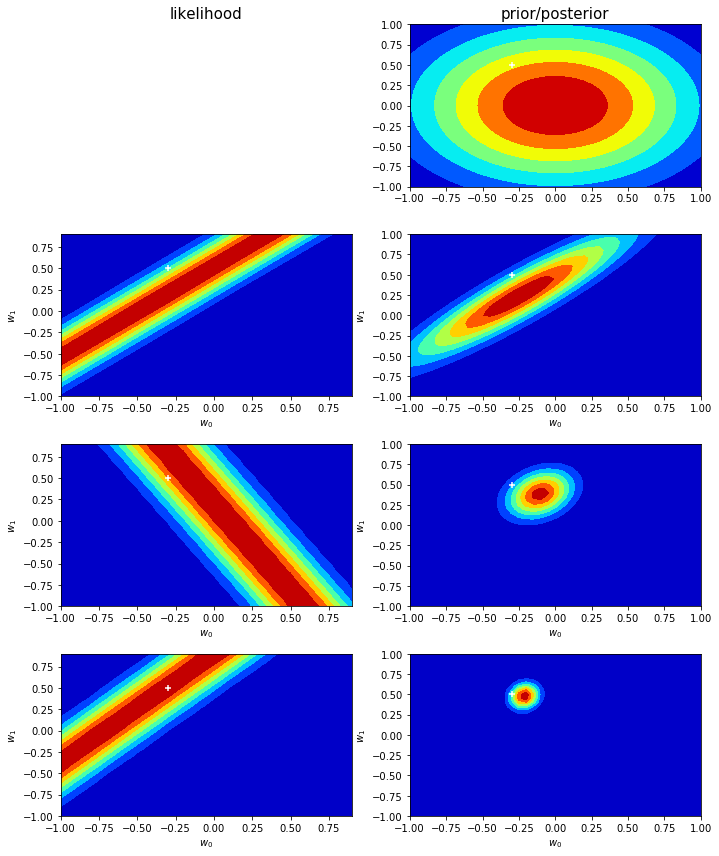

In [13]:
N = 10
nobs = [1, 2, 10]
ix_fig = 1
fig, ax = plt.subplots(len(nobs) + 1, 2, figsize=(10, 12))
plot_prior(mN, SN, ax=ax[0,1])
ax[0, 1].scatter(-0.3, 0.5, c="white", marker="+")
ax[0, 0].axis("off")
for i in range(0, N+1):
    Phi, t = sample_vals(X, T, i)
    SN, mN = posterior_w(Phi, t, SN, mN)
    if i+1 in nobs:
        plot_likelihood_obs(X, T, i, ax=ax[ix_fig, 0])
        plot_prior(mN, SN, ax=ax[ix_fig, 1])
        ax[ix_fig, 1].scatter(-0.3, 0.5, c="white", marker="+")
        for l in range(2):
            ax[ix_fig, l].set_xlabel("$w_0$")
            ax[ix_fig, l].set_ylabel("$w_1$")
        ix_fig += 1

titles = ["likelihood", "prior/posterior"]
for axi, title in zip(ax[0], titles):
    axi.set_title(title, size=15)
fig.tight_layout()